## Observations and Insights

1-	After analyzing the data, it seems that Capomulin and Ramicane produce the most promising results when it comes to the tumor size. Both show a significant reduction on size across all statistical categories.  

2-	With a r-squared value of 0.84, there is a positive correlation between mice weight and the average tumor volume, which makes sense that having a larger mass (tumor) would make the mouse have more weight.  

3-	The bar graphs show that more mice were treated with the 2 drugs that had positive effects on tumor size compared to the other drugs used in this study. 


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on=('Mouse ID'))
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice = merged_data["Mouse ID"].unique()
drugs = merged_data["Drug Regimen"].unique()
time = merged_data["Timepoint"].unique()

number_mouse = len(mice)
number_drugs = len(drugs)
number_measurements = len(time)
number_samples = (number_drugs * number_measurements)

data_summary = pd.DataFrame({"Number of Mice": [number_mouse],
                         "Number of Drug Regimen Treatments": [number_drugs],
                         "Number of Time Measurements": [number_measurements],
                         "Number of Samples": [number_samples]})

mean_volume = pd.DataFrame(round(merged_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],2))
median_volume = pd.DataFrame(round(merged_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],2))
variance = pd.DataFrame(round(merged_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],2))
stdev = pd.DataFrame(round(merged_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2))
SEM = pd.DataFrame(round(merged_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2))


mean_volume = mean_volume.rename(columns={"Tumor Volume (mm3)":"Mean"})
median_volume = median_volume.rename(columns={"Tumor Volume (mm3)":"Median"})
variance = variance.rename(columns={"Tumor Volume (mm3)":"Variance"})
stdev = stdev.rename(columns={"Tumor Volume (mm3)":"StDev"})
SEM = SEM.rename(columns={"Tumor Volume (mm3)":"SEM"})

summary_stat = [mean_volume, median_volume, variance, stdev, SEM]
summary_stat = pd.concat(summary_stat,axis=1,join='inner')
summary_stat

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

Text(0, 0.5, 'Number of Data Points')

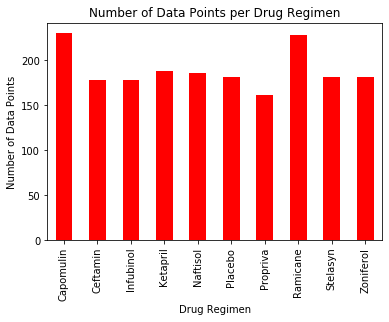

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_reg = merged_data.groupby(["Drug Regimen"])
data_points = treatment_reg["Drug Regimen"].count()
data_points.plot(kind="bar", color='red', y=data_points)
plt.title("Number of Data Points per Drug Regimen")
plt.ylabel("Number of Data Points")

Text(0, 0.5, 'Number of Data Points')

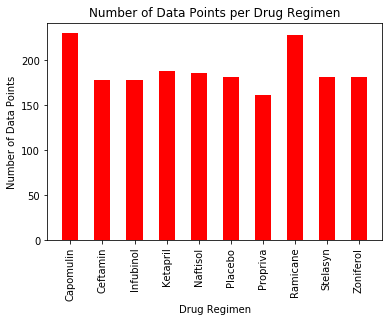

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(data_points))
plt.bar(x_axis, data_points, alpha=1, color='red', width=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, data_points.index, rotation='vertical')
plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie plots

Text(0.5, 1.0, 'Male vs. Female Mice')

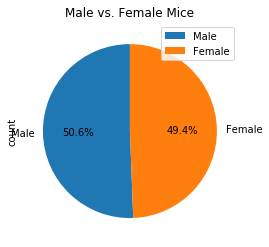

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#generate 
gender_count = pd.DataFrame(merged_data["Sex"].value_counts())
#gender_count - used this to generate the number of male and female mice

gender_df = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
gender_pie = gender_df.plot.pie(y='count',autopct="%1.1f%%", startangle=90)
plt.title('Male vs. Female Mice')

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


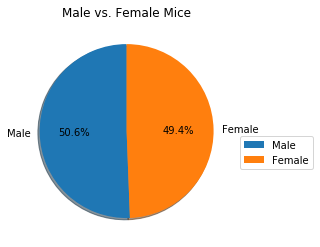

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(gender_count, labels=labels,shadow=True, autopct="%1.1f%%",startangle=90)
#plt.xticks(x_axis,Drug_Regimen,rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),fontsize = 10)
plt.title("Male vs. Female Mice")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Capomulin, Ramicane, Infubinol, and Ceftamin

final_vol_data=pd.merge(study_results,mouse_metadata, on="Mouse ID", how="inner")
final_vol_table=final_vol_data[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]

final_vol_df=final_vol_table.groupby("Mouse ID").tail(1)
final_vol_df=final_vol_df.set_index(["Drug Regimen"], inplace=False)

final_vol_drug=final_vol_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
final_vol_drug.head()


,Mouse ID,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,b128,45,38.982878
Capomulin,j246,35,38.753265
Capomulin,r554,45,32.377357
Capomulin,s185,45,23.343598
Capomulin,b742,45,38.939633


In [8]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
#Capomulin IQR
quartiles_capomulin=final_vol_drug.loc["Capomulin","Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq = quartiles_capomulin[0.25]
upperq = quartiles_capomulin[0.75]
iqr = upperq - lowerq

print("Capomulin:")
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {round(quartiles_capomulin[0.5],2)} ")

#calculate outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")


Capomulin:
The lower quartile of Tumor Volume is: 32.38
The upper quartile of Tumor Volume is: 40.16
The interquartile range of Tumor Volume is: 7.78
The the median of Tumor Volume is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [9]:
#Ramicane IQR
quartiles_Ramicane=final_vol_drug.loc["Ramicane","Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq = quartiles_Ramicane[0.25]
upperq = quartiles_Ramicane[0.75]
iqr = upperq - lowerq

print("Ramicane:")
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {round(quartiles_Ramicane[0.5],2)} ")

#calculate outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

Ramicane:
The lower quartile of Tumor Volume is: 31.56
The upper quartile of Tumor Volume is: 40.66
The interquartile range of Tumor Volume is: 9.1
The the median of Tumor Volume is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [10]:
#Infubinol IQR
quartiles_Infubinol=final_vol_drug.loc["Infubinol","Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq = quartiles_Infubinol[0.25]
upperq = quartiles_Infubinol[0.75]
iqr = upperq - lowerq

print("Infubinol:")
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {round(quartiles_Infubinol[0.5],2)} ")

#calculate outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

Infubinol:
The lower quartile of Tumor Volume is: 54.05
The upper quartile of Tumor Volume is: 65.53
The interquartile range of Tumor Volume is: 11.48
The the median of Tumor Volume is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


In [11]:
#Ceftamin IQR
quartiles_Ceftamin=final_vol_drug.loc["Ceftamin","Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq = quartiles_Ceftamin[0.25]
upperq = quartiles_Ceftamin[0.75]
iqr = upperq - lowerq

print("Ceftamin:")
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {round(quartiles_Ceftamin[0.5],2)} ")

#calculate outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

Ceftamin:
The lower quartile of Tumor Volume is: 48.72
The upper quartile of Tumor Volume is: 64.3
The interquartile range of Tumor Volume is: 15.58
The the median of Tumor Volume is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


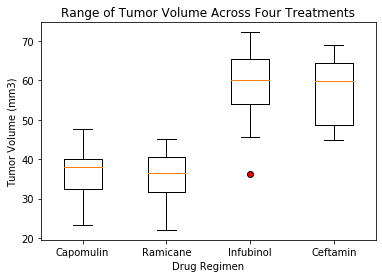

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_capomulin = final_vol_drug.loc["Capomulin","Tumor Volume (mm3)"]
box_Ramicane = final_vol_drug.loc["Ramicane","Tumor Volume (mm3)"]
box_Infubinol = final_vol_drug.loc["Infubinol","Tumor Volume (mm3)"]
box_Ceftamin = final_vol_drug.loc["Ceftamin","Tumor Volume (mm3)"]

box1 = box_capomulin, box_Ramicane, box_Infubinol, box_Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title('Range of Tumor Volume Across Four Treatments')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
red_outliers = dict(markerfacecolor='r')
plt.xticks([], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.boxplot(box1, flierprops=red_outliers)
plt.show()

## Line and scatter plots

(0, 45)

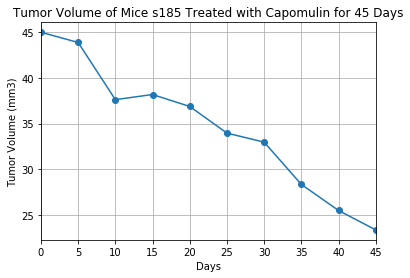

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line_data = merged_data.set_index(["Mouse ID"], inplace=False)
s185_data = line_data.loc["s185"]
#s185_data- used to obtain mouse ID

x_s185_data = s185_data["Timepoint"]
y_s185_data = s185_data["Tumor Volume (mm3)"]
plt.plot(x_s185_data, y_s185_data, 'o-')
plt.title("Tumor Volume of Mice s185 Treated with Capomulin for 45 Days")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.xlim(0, 45)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

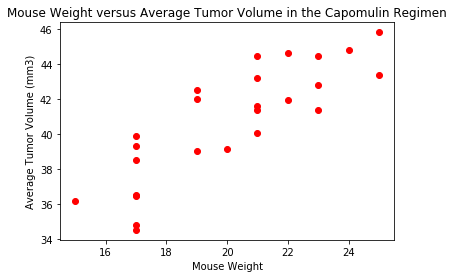

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight_vol_data = merged_data.set_index(["Drug Regimen"], inplace=False)
weight_vol_table = weight_vol_data.loc["Capomulin"]
#weight_vol_table.head()- used to obtain weights

x_weight_vol = weight_vol_table.groupby(["Mouse ID"])["Weight (g)"].mean()
y_weight_vol = weight_vol_table.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(x_weight_vol, y_weight_vol, marker="o", color="r")
plt.title("Mouse Weight versus Average Tumor Volume in the Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")

The correlation between Mouse Weight and Average Tumor Volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

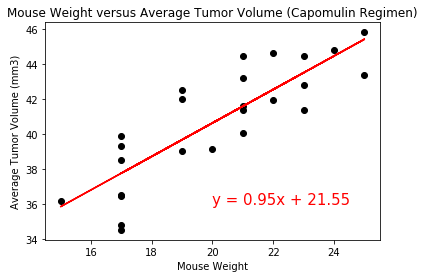

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_weight_vol,y_weight_vol)
print(f"The correlation between Mouse Weight and Average Tumor Volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_weight_vol, y_weight_vol)
regress_values = x_weight_vol * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_weight_vol, y_weight_vol, marker="o", color="black")
plt.plot(x_weight_vol,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse Weight versus Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")